<a href="https://colab.research.google.com/github/kc6699c/Komal_INFO5731_Fall2024/blob/main/INFO5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [5]:
# Write your code here
import re
from collections import defaultdict


reviews = [
    "The product quality is outstanding and exceeded my expectations.",
    "I was disappointed with the service; it was slow and unprofessional.",
    "The customer support team was very helpful and resolved my issues quickly.",
    "Great value for money! I would definitely recommend it to others.",
    "The packaging was damaged when it arrived, but the product was intact.",
    "I love the design and the color options available for this item.",
    "This is by far the best purchase I've made this year. Highly recommended!",
    "The instructions were unclear, making it difficult to assemble.",
    "Excellent performance and battery life. Worth every penny!",
    "Not happy with the size. It didn't match the description on the website.",
    "Fast delivery and great quality. I’m very satisfied with my purchase.",
    "The product stopped working after a few days. Very disappointed.",
    "Amazing customer service! They went above and beyond to help me.",
    "This item is not durable and broke within a week of use.",
    "Very comfortable and easy to use. I would buy it again.",
    "The sound quality is incredible, especially for the price.",
    "Poor build quality. I expected better for the cost.",
    "The color is beautiful, and it matches perfectly with my decor.",
    "I received a faulty item, but they replaced it promptly.",
    "Good for daily use, but not suitable for heavy-duty tasks."
]

def tokenize(text):
    return [word.lower() for word in re.findall(r'\b\w+\b', text)]

def count_ngrams(reviews, N=3):
    ngram_counts = defaultdict(int)
    for review in reviews:
        tokens = tokenize(review)
        for i in range(len(tokens) - N + 1):
            ngram = tuple(tokens[i:i+N])
            ngram_counts[ngram] += 1
    return ngram_counts

def calculate_bigram_probabilities(reviews):
    bigram_counts = defaultdict(int)
    word_counts = defaultdict(int)

    for review in reviews:
        tokens = tokenize(review)
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            bigram_counts[bigram] += 1
            word_counts[tokens[i]] += 1

        if tokens:
            word_counts[tokens[-1]] += 1

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        word1 = bigram[0]
        bigram_probabilities[bigram] = count / word_counts[word1]

    return bigram_probabilities

def extract_noun_phrases(text):
    tokens = tokenize(text)
    noun_phrases = []
    current_phrase = []
    for word in tokens:
        if len(word) > 3:
            current_phrase.append(word)
        else:
            if current_phrase:
                noun_phrases.append(" ".join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases

def calculate_noun_phrase_frequencies(reviews):
    noun_phrase_counts = defaultdict(int)
    all_noun_phrases = []

    review_noun_phrases = []
    for review in reviews:
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrases.append(noun_phrases)
        for phrase in noun_phrases:
            noun_phrase_counts[phrase] += 1
        all_noun_phrases.extend(noun_phrases)

    max_noun_phrase_count = max(noun_phrase_counts.values())

    relative_frequencies = []
    for noun_phrases in review_noun_phrases:
        review_frequencies = {}
        for phrase in noun_phrases:
            review_frequencies[phrase] = noun_phrase_counts[phrase] / max_noun_phrase_count
        relative_frequencies.append(review_frequencies)

    return relative_frequencies


trigram_counts = count_ngrams(reviews, N=3)
print("Trigram Counts:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

bigram_probabilities = calculate_bigram_probabilities(reviews)
print("\nBigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob:.2f}")

relative_frequencies = calculate_noun_phrase_frequencies(reviews)
print("\nNoun Phrase Relative Frequencies per Review:")
for i, freq_dict in enumerate(relative_frequencies):
    print(f"Review {i+1}:")
    for phrase, rel_freq in freq_dict.items():
        print(f"  {phrase}: {rel_freq:.2f}")

Trigram Counts:
('the', 'product', 'quality'): 1
('product', 'quality', 'is'): 1
('quality', 'is', 'outstanding'): 1
('is', 'outstanding', 'and'): 1
('outstanding', 'and', 'exceeded'): 1
('and', 'exceeded', 'my'): 1
('exceeded', 'my', 'expectations'): 1
('i', 'was', 'disappointed'): 1
('was', 'disappointed', 'with'): 1
('disappointed', 'with', 'the'): 1
('with', 'the', 'service'): 1
('the', 'service', 'it'): 1
('service', 'it', 'was'): 1
('it', 'was', 'slow'): 1
('was', 'slow', 'and'): 1
('slow', 'and', 'unprofessional'): 1
('the', 'customer', 'support'): 1
('customer', 'support', 'team'): 1
('support', 'team', 'was'): 1
('team', 'was', 'very'): 1
('was', 'very', 'helpful'): 1
('very', 'helpful', 'and'): 1
('helpful', 'and', 'resolved'): 1
('and', 'resolved', 'my'): 1
('resolved', 'my', 'issues'): 1
('my', 'issues', 'quickly'): 1
('great', 'value', 'for'): 1
('value', 'for', 'money'): 1
('for', 'money', 'i'): 1
('money', 'i', 'would'): 1
('i', 'would', 'definitely'): 1
('would', 'defin

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [6]:
import math
import re
from collections import defaultdict, Counter

documents = [
    "The product quality is outstanding and exceeded my expectations.",
    "I was disappointed with the service; it was slow and unprofessional.",
    "The customer support team was very helpful and resolved my issues quickly.",
    "Great value for money! I would definitely recommend it to others.",
    "The packaging was damaged when it arrived, but the product was intact.",
    "I love the design and the color options available for this item.",
    "This is by far the best purchase I've made this year. Highly recommended!",
    "The instructions were unclear, making it difficult to assemble.",
    "Excellent performance and battery life. Worth every penny!",
    "Not happy with the size. It didn't match the description on the website.",
    "Fast delivery and great quality. I’m very satisfied with my purchase.",
    "The product stopped working after a few days. Very disappointed.",
    "Amazing customer service! They went above and beyond to help me.",
    "This item is not durable and broke within a week of use.",
    "Very comfortable and easy to use. I would buy it again.",
    "The sound quality is incredible, especially for the price.",
    "Poor build quality. I expected better for the cost.",
    "The color is beautiful, and it matches perfectly with my decor.",
    "I received a faulty item, but they replaced it promptly.",
    "Good for daily use, but not suitable for heavy-duty tasks."
]

def tokenize(text):
    return [word.lower() for word in re.findall(r'\b\w+\b', text)]

def calculate_tf(documents):
    tf_matrix = []
    for document in documents:
        tokens = tokenize(document)
        word_counts = Counter(tokens)
        total_words = len(tokens)
        tf_matrix.append({word: count / total_words for word, count in word_counts.items()})
    return tf_matrix

def calculate_idf(documents):
    total_docs = len(documents)
    word_document_counts = defaultdict(int)
    for document in documents:
        tokens = set(tokenize(document))  # Unique words in the document
        for token in tokens:
            word_document_counts[token] += 1
    idf = {word: math.log(total_docs / count) for word, count in word_document_counts.items()}
    return idf

def calculate_tf_idf(tf_matrix, idf):
    tf_idf_matrix = []
    for tf in tf_matrix:
        tf_idf_matrix.append({word: tf[word] * idf[word] for word in tf})
    return tf_idf_matrix

def query_to_vector(query, idf):
    tokens = tokenize(query)
    word_counts = Counter(tokens)
    total_words = len(tokens)
    query_tf = {word: count / total_words for word, count in word_counts.items()}
    query_vector = {word: query_tf[word] * idf.get(word, 0) for word in query_tf}
    return query_vector

def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector[word] * query_vector.get(word, 0) for word in doc_vector)
    doc_magnitude = math.sqrt(sum(value**2 for value in doc_vector.values()))
    query_magnitude = math.sqrt(sum(value**2 for value in query_vector.values()))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0
    return dot_product / (doc_magnitude * query_magnitude)

tf_matrix = calculate_tf(documents)

idf = calculate_idf(documents)

tf_idf_matrix = calculate_tf_idf(tf_matrix, idf)

query = "An outstanding product with excellent quality and great performance"
query_vector = query_to_vector(query, idf)

cosine_similarities = [cosine_similarity(doc_vector, query_vector) for doc_vector in tf_idf_matrix]

ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)
print("Ranking of documents with respect to the query:")
for idx, score in ranked_documents:
    print(f"Document {idx+1} (Score: {score:.4f}): {documents[idx]}")


Ranking of documents with respect to the query:
Document 1 (Score: 0.3921): The product quality is outstanding and exceeded my expectations.
Document 9 (Score: 0.3596): Excellent performance and battery life. Worth every penny!
Document 11 (Score: 0.2231): Fast delivery and great quality. I’m very satisfied with my purchase.
Document 4 (Score: 0.1048): Great value for money! I would definitely recommend it to others.
Document 12 (Score: 0.0720): The product stopped working after a few days. Very disappointed.
Document 2 (Score: 0.0688): I was disappointed with the service; it was slow and unprofessional.
Document 5 (Score: 0.0676): The packaging was damaged when it arrived, but the product was intact.
Document 18 (Score: 0.0675): The color is beautiful, and it matches perfectly with my decor.
Document 16 (Score: 0.0611): The sound quality is incredible, especially for the price.
Document 17 (Score: 0.0566): Poor build quality. I expected better for the cost.
Document 10 (Score: 0.0446)

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec model trained and saved.


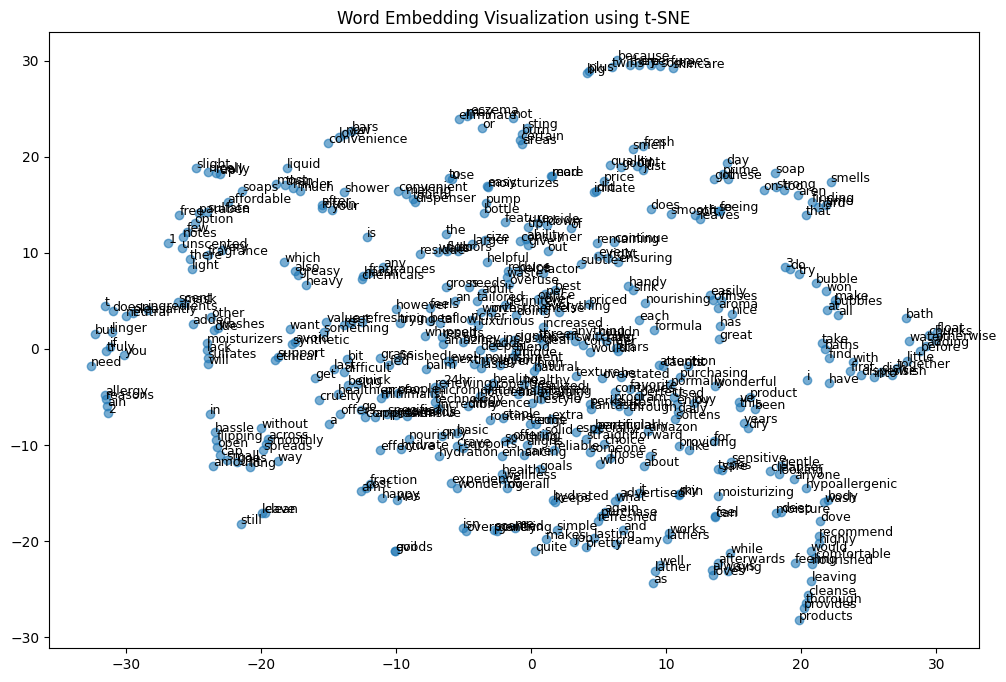

In [9]:
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/Amazon_Product_Reviews.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Preprocess the text data
def preprocess(text):
    # Tokenize and remove non-alphabetic characters
    return re.findall(r'\b\w+\b', text.lower())

# Apply preprocessing to the 'review_text' column
processed_docs = data['review_text'].dropna().apply(preprocess).tolist()

# Train Word2Vec model with 300 dimensions
embedding_dim = 300
model = Word2Vec(sentences=processed_docs, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Save the model
model.save("custom_word2vec.model")
print("Word2Vec model trained and saved.")

# Visualize the word embeddings using t-SNE
# Get vocabulary and their embeddings
words = list(model.wv.index_to_key)
embeddings = model.wv[words]

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6)
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word, fontsize=9)
plt.title("Word Embedding Visualization using t-SNE")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/kc6699c/Komal_INFO5731_Fall2024/blob/main/Amazon_Product_Reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
# The assignment needs to be completed in short time. We need more time to do.